In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow.keras.layers import Dense , Dropout
from scikeras.wrappers import KerasRegressor 
from tensorflow.keras.callbacks import EarlyStopping
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV

In [2]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_All_D4_t_500_I_F_PKL.pkl')
# copy = data[data['Zeitpunkt']== 500]
# copy.to_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_All_D4_t_500_I_F_PKL.pkl')
# copy
data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
42840,0.0000,-0.00200,500,6000,5000,753.54
42841,0.0000,-0.00192,500,6000,5000,835.65
42842,0.0000,-0.00184,500,6000,5000,919.98
42843,0.0000,-0.00176,500,6000,5000,1007.40
42844,0.0000,-0.00168,500,6000,5000,1097.60
...,...,...,...,...,...,...
351283,0.0024,0.00168,500,9000,5000,1365.50
351284,0.0024,0.00176,500,9000,5000,1247.20
351285,0.0024,0.00184,500,9000,5000,1114.10
351286,0.0024,0.00192,500,9000,5000,983.97


In [3]:
bedingung = (data['Kraft'] == 6000) & (data['Strom'] == 7000)
df_test = data[bedingung].copy()
print(df_test)
#df_test.to_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_I7000_F6000_D3_500_I_F_PKL.pkl')
data_all = data.drop(df_test.index)
#print(data_all)
print(data_all[(data_all['Kraft'] == 6000) & (data_all['Strom'] == 7000)])
df_test

        X-Koordinate  Y-Koordinate  Zeitpunkt  Strom  Kraft  Temperatur
174573        0.0000      -0.00200        500   7000   6000      811.76
174574        0.0000      -0.00192        500   7000   6000      897.57
174575        0.0000      -0.00184        500   7000   6000      986.34
174576        0.0000      -0.00176        500   7000   6000     1077.80
174577        0.0000      -0.00168        500   7000   6000     1176.80
...              ...           ...        ...    ...    ...         ...
175639        0.0024       0.00168        500   7000   6000      942.96
175640        0.0024       0.00176        500   7000   6000      865.10
175641        0.0024       0.00184        500   7000   6000      786.99
175642        0.0024       0.00192        500   7000   6000      708.11
175643        0.0024       0.00200        500   7000   6000      690.48

[1071 rows x 6 columns]
Empty DataFrame
Columns: [X-Koordinate, Y-Koordinate, Zeitpunkt, Strom, Kraft, Temperatur]
Index: []


,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
174573,0.0000,-0.00200,500,7000,6000,811.76
174574,0.0000,-0.00192,500,7000,6000,897.57
174575,0.0000,-0.00184,500,7000,6000,986.34
174576,0.0000,-0.00176,500,7000,6000,1077.80
174577,0.0000,-0.00168,500,7000,6000,1176.80
...,...,...,...,...,...,...
175639,0.0024,0.00168,500,7000,6000,942.96
175640,0.0024,0.00176,500,7000,6000,865.10
175641,0.0024,0.00184,500,7000,6000,786.99
175642,0.0024,0.00192,500,7000,6000,708.11


In [4]:
df = data_all.drop('Zeitpunkt', axis = 1)
df

,X-Koordinate,Y-Koordinate,Strom,Kraft,Temperatur
42840,0.0000,-0.00200,6000,5000,753.54
42841,0.0000,-0.00192,6000,5000,835.65
42842,0.0000,-0.00184,6000,5000,919.98
42843,0.0000,-0.00176,6000,5000,1007.40
42844,0.0000,-0.00168,6000,5000,1097.60
...,...,...,...,...,...
351283,0.0024,0.00168,9000,5000,1365.50
351284,0.0024,0.00176,9000,5000,1247.20
351285,0.0024,0.00184,9000,5000,1114.10
351286,0.0024,0.00192,9000,5000,983.97


In [5]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

        X-Koordinate  Y-Koordinate  Strom  Kraft  Temperatur
307240       0.00216      -0.00072   8000   7000      1793.5
306384       0.00012       0.00016   8000   7000      2115.6
350367       0.00024       0.00184   9000   5000      1190.3
351031       0.00180       0.00192   9000   5000      1008.4
262887       0.00108       0.00064   8000   6000      2046.2
...              ...           ...    ...    ...         ...
263302       0.00204       0.00120   8000   6000      1600.1
263337       0.00216      -0.00008   8000   6000      1997.7
306341       0.00000       0.00080   8000   7000      1903.8
43700        0.00192       0.00152   6000   5000      1077.6
351061       0.00192       0.00024   9000   5000      2364.4

[7497 rows x 5 columns]


,X-Koordinate,Y-Koordinate,Strom,Kraft,Temperatur
0,0.00216,-0.00072,8000,7000,1793.5
1,0.00012,0.00016,8000,7000,2115.6
2,0.00024,0.00184,9000,5000,1190.3
3,0.00180,0.00192,9000,5000,1008.4
4,0.00108,0.00064,8000,6000,2046.2
...,...,...,...,...,...
7492,0.00204,0.00120,8000,6000,1600.1
7493,0.00216,-0.00008,8000,6000,1997.7
7494,0.00000,0.00080,8000,7000,1903.8
7495,0.00192,0.00152,6000,5000,1077.6


In [6]:
y = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
X = df_reset.drop("Temperatur", axis=1)

label = df_test["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
X_2 = df_test.drop("Temperatur", axis=1)
X_2 = X_2.drop('Zeitpunkt', axis=1)
X_2 = X_2.reset_index(drop=True)
y_2 = label

In [7]:
X

,X-Koordinate,Y-Koordinate,Strom,Kraft
0,0.00216,-0.00072,8000,7000
1,0.00012,0.00016,8000,7000
2,0.00024,0.00184,9000,5000
3,0.00180,0.00192,9000,5000
4,0.00108,0.00064,8000,6000
...,...,...,...,...
7492,0.00204,0.00120,8000,6000
7493,0.00216,-0.00008,8000,6000
7494,0.00000,0.00080,8000,7000
7495,0.00192,0.00152,6000,5000


In [9]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
scaler_features2 = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X)
X_test_scaled = scaler_features.transform(X_2)  # Nutze unterschiedliche Skalierungsparameter

# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()


# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_2.values.reshape(-1, 1))


In [10]:
X_train_scaled

array([[0.9       , 0.32      , 0.66666667, 0.5       ],
       [0.05      , 0.54      , 0.66666667, 0.5       ],
       [0.1       , 0.96      , 1.        , 0.        ],
       ...,
       [0.        , 0.7       , 0.66666667, 0.5       ],
       [0.8       , 0.88      , 0.        , 0.        ],
       [0.8       , 0.56      , 1.        , 0.        ]])

In [10]:
y_train_scaled.max()

1.0

In [13]:
# Netzwerkarchitektur
model = Sequential([

    Dense(328, activation='relu', input_shape=(4,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)), 
    
    Dense(328, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
    
    Dense(248, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
    
    Dense(104, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
    
    Dense(1 , activation = 'linear')
])

# Optimierer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modell kompilieren (Verwendung von mean_squared_error als Verlustfunktion für Regression)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])  # Metriken für Regression: Mean Absolute Error und Mean Squared Error

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Trainingsparameter
batch_size = 16
epochs = 2000

# Modell trainieren (Annahme: X_train, y_train, X_val, y_val sind vordefiniert)
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

model.save('D4_I_F_2.h5')

Epoch 1/2000
375/375 [==============================] - 2s 3ms/step - loss: 0.0486 - mae: 0.1219 - val_loss: 0.0282 - val_mae: 0.0703
Epoch 2/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.0254 - mae: 0.0649 - val_loss: 0.0207 - val_mae: 0.0453
Epoch 3/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.0211 - mae: 0.0515 - val_loss: 0.0191 - val_mae: 0.0444
Epoch 4/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.0185 - mae: 0.0383 - val_loss: 0.0169 - val_mae: 0.0268
Epoch 5/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.0173 - mae: 0.0314 - val_loss: 0.0164 - val_mae: 0.0243
Epoch 6/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.0168 - mae: 0.0284 - val_loss: 0.0160 - val_mae: 0.0236
Epoch 7/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.0157 - mae: 0.0196 - val_loss: 0.0161 - val_mae: 0.0304
Epoch 8/2000
375/375 [==============================] - 1s 2ms

C:\Users\erikm\Desktop\Diplomarbeit Erik Marr\Projekt X\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Initialisiere Listen, um Ergebnisse zu speichern
val_loss_results = []
val_mae_results = []

# Funktion, um das Modell zu erstellen
def create_model():
    model = Sequential([
                Dense(328, activation='relu', input_shape=(4,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)), 
                
                Dense(328, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
                
                Dense(248, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
                
                Dense(104, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
                
                Dense(1 , activation = 'linear')

    ])
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# K-Fold Cross-Validation Konfiguration
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Leistungsüberwachung
fold_no = 1
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train_scaled[train_index], y_train_scaled[val_index]

    model = create_model()

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

    print(f'Training für Fold {fold_no}...')
    history = model.fit(X_train_fold, y_train_fold, batch_size=16, epochs=1000, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], verbose=1)

    # Speichere die Ergebnisse des aktuellen Folds
    val_loss_results.append(min(history.history['val_loss']))
    val_mae_results.append(min(history.history['val_mae']))

    fold_no += 1

# Berechne den Durchschnitt über alle Folds
average_val_loss = np.mean(val_loss_results)
average_val_mae = np.mean(val_mae_results)

# Umwandeln der Listen in Pandas DataFrames
val_loss_df = pd.DataFrame(val_loss_results, columns=['Validation Loss'])
val_mae_df = pd.DataFrame(val_mae_results, columns=['Validation MAE'])

# Speichern der DataFrames in CSV-Dateien
val_loss_df.to_csv('val_loss_results_D4_I_F_2.csv', index=False)
val_mae_df.to_csv('val_mae_results_D4_I_F_2.csv', index=False)

# Gib die durchschnittlichen Ergebnisse aus
print(f'Durchschnittlicher Validation Loss: {average_val_loss}')
print(f'Durchschnittlicher Validation MAE: {average_val_mae}')


Training für Fold 1...
Epoch 1/1000
375/375 [==============================] - 5s 5ms/step - loss: 0.0702 - mae: 0.1457 - val_loss: 0.0348 - val_mae: 0.0878
Epoch 2/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.0284 - mae: 0.0707 - val_loss: 0.0237 - val_mae: 0.0501
Epoch 3/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.0212 - mae: 0.0475 - val_loss: 0.0212 - val_mae: 0.0559
Epoch 4/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.0188 - mae: 0.0373 - val_loss: 0.0174 - val_mae: 0.0262
Epoch 5/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.0172 - mae: 0.0286 - val_loss: 0.0165 - val_mae: 0.0209
Epoch 6/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.0164 - mae: 0.0225 - val_loss: 0.0159 - val_mae: 0.0174
Epoch 7/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.0162 - mae: 0.0225 - val_loss: 0.0159 - val_mae: 0.0203
Epoch 8/1000
375/375 [=================

In [12]:
results = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
results

34/34 - 0s - loss: 2.7900e-04 - mae: 0.0051 - 56ms/epoch - 2ms/step


[0.0002789987192954868, 0.005051739513874054]

In [14]:
scaled_predicted_values = model.predict(X_test_scaled, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled)  # y_test sind die skalierten tatsächlichen Werte
print(f' Bsp. Predicted: {original_predicted_values[100]} Actual: {original_actual_values[100]} ')

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")

    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]

    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)

    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

errors = np.abs((original_actual_values - original_predicted_values) / original_actual_values)
mape = np.mean(errors) * 100
print(mape)

 Bsp. Predicted: [761.60394] Actual: [754.68] 
Durchschnittliche Abweichung (MAE): [9.58234117]
0.6724385251128935


In [15]:
#Berechnung der Auswertungsgröße R^2

def calculate_r_squared(predicted, actual):
    # Berechnung des Mittelwerts der tatsächlichen Werte
    mean_actual = sum(actual) / len(actual)
    
    # Berechnung der totalen Summe der Quadrate (SST)
    sst = sum((x - mean_actual) ** 2 for x in actual)
    
    # Berechnung der Summe der Quadrate der Residuen (SSE)
    sse = sum((actual[i] - predicted[i]) ** 2 for i in range(len(actual)))
    
    # Berechnung des R^2-Wertes
    r_squared = 1 - (sse / sst)
    
    return r_squared

# Berechnung von R^2 mit den bereitgestellten Listen
r_squared = calculate_r_squared(list1, list2)

print(f"R^2: {r_squared}")

R^2: [0.99895532]


In [51]:
df_result = pd.DataFrame({'Echt': [val[0] for val in list1], 'Vorhergesagt': [val[0] for val in list2]})
df_result['X-Koordinate'] = X_test_scaled[:, 0]
df_result['Y-Koordinate'] = X_test_scaled[:, 1]
df_result['Zeitpunkt'] = X_test_scaled[:, 2]

df_result['Differenz'] = df_result['Echt'] - df_result['Vorhergesagt']
df_result['Differenz'].sort_values()
sorted_df = df_result.sort_values(by= 'Differenz')
Anzahl_Punkte = (sorted_df['Differenz'] < -5).sum()
print("Anzahl der Werte die kleiner sind:", Anzahl_Punkte)

sorted_df


Anzahl der Werte die kleiner sind: 131


,Echt,Vorhergesagt,X-Koordinate,Y-Koordinate,Zeitpunkt,Differenz
5913,649.919800,673.72,1.00,0.94,0.700,-23.800200
6769,520.552734,543.98,1.00,0.94,0.225,-23.427266
2678,738.266052,759.01,1.00,0.90,0.700,-20.743948
1950,512.838440,533.12,1.00,0.94,0.200,-20.281560
1837,628.636475,648.25,1.00,0.94,0.625,-19.613525
...,...,...,...,...,...,...
573,428.385986,409.84,1.00,0.98,0.125,18.545986
6539,582.942627,563.29,0.95,0.98,0.875,19.652627
991,560.379883,538.83,0.95,0.98,0.750,21.549883
7585,450.709320,428.07,1.00,0.98,0.200,22.639320


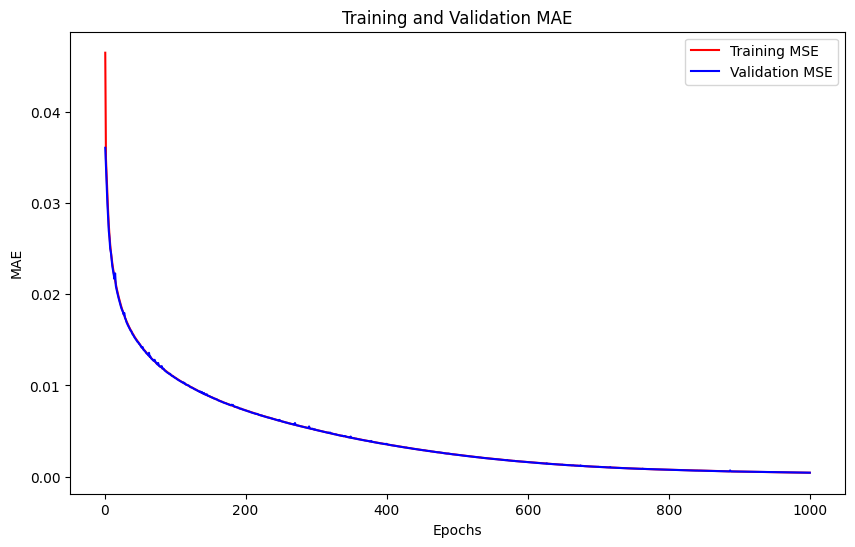

In [52]:
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MSE')
plt.plot(epochs, val_mae, 'b', label='Validation MSE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

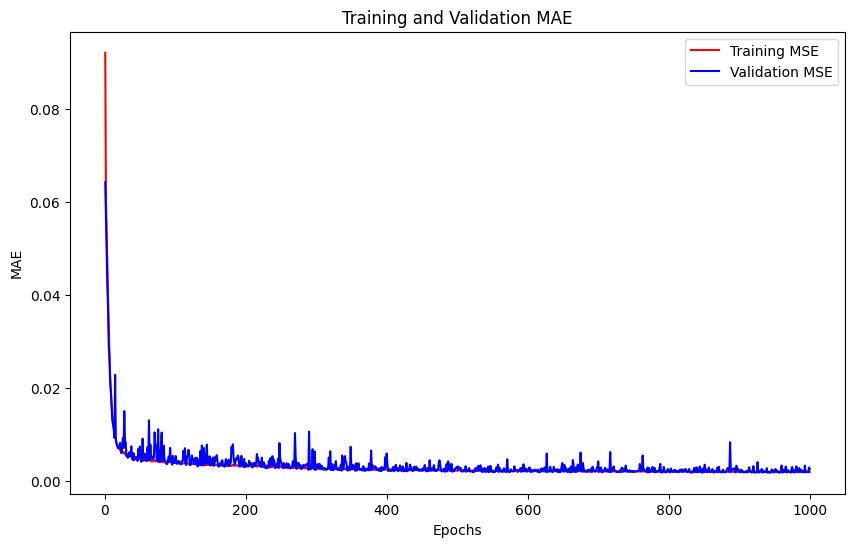

In [53]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MSE')
plt.plot(epochs, val_mae, 'b', label='Validation MSE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()


#plt.ylim(0.00, 0.01)


plt.show()

# GridSearch

In [ ]:
# def build_model(learning_rate=0.001, activation='relu', regularization=0.0001, dropout_rate=0.0):
#     model = Sequential()
#     model.add(Dense(448, activation=activation, input_shape=(3,), kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(384, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(96, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(128, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(320, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(416, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(416, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))
# 
#     model.add(Dense(256, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
#     model.add(Dropout(dropout_rate))    
# 
#     model.add(Dense(1, activation='linear'))
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])
#     return model
# 
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# 
# # Verwenden Sie eine Funktion, um das Modell zu instanziieren, für scikit-learn Wrapper
# model = KerasRegressor(model=build_model, verbose=2, callbacks=[early_stopping])
# 
# # Anpassung der Parameter im param_grid
# param_grid = {
#     'model__learning_rate': [0.001, 0.0001],
#     'model__regularization': [0.001, 0.0001],
#     'fit__batch_size': [10, 25, 50, 75],
#     'fit__epochs': [50],
#     'model__dropout_rate' : [0.0, 0.1, 0.2]
# }
# 
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)
# # Hinweis: Stellen Sie sicher, dass Ihre Daten (X_train_scaled, y_train_scaled) korrekt definiert sind
# grid_result = grid_search.fit(X_train_scaled, y_train_scaled)
# # Beste Parameter und Score ausgeben
# print("Beste Parameter:", grid_search.best_params_)
# print("Beste Genauigkeit:", grid_search.best_score_)
# 
# with open("Gridsearch_D4.txt", "w") as f:
#     f.write(f"Beste Parameter: {grid_search.best_params_}\n")
#     f.write(f"Beste Genauigkeit: {grid_search.best_score_}")


In [ ]:
# Funktion zum Erstellen des Modells
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('input_units', min_value=8, max_value=328, step=16), input_shape=(3,), activation='relu'))
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=8, max_value=656, step=16), activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Durchführung der Random Search dreimal
for run in range(1, 4):
    # Anpassen des Verzeichnisses und des Projektnamens für jeden Durchlauf
    directory = 'random_search'
    project_name = f'random_search_D4_t_2_{run}'

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=100,
        executions_per_trial=2,
        directory=directory,
        project_name=project_name
    )

    # Durchführung des Random Search
    tuner.search(X_train_scaled, y_train_scaled, epochs=50, verbose =0, batch_size=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

    # Abrufen und Speichern des besten Modells
    best_model = tuner.get_best_models(num_models=1)[0]
    model_path = os.path.join(directory, project_name, 'best_model.h5') 
    best_model.save(model_path)


    # Optional: Abrufen und Ausgeben der besten Hyperparameter
    best_hyperparameters = tuner.get_best_hyperparameters()[0]

    # Konvertieren der Hyperparameter in ein DataFrame
    df_hyperparameters = pd.DataFrame([best_hyperparameters.values])
    # Speichern des DataFrame als CSV
    df_hyperparameters.to_csv(f'random_search_D4_t_2_{run}.csv', index=False)

    print(f"Beste Hyperparameter für Lauf {run}: {best_hyperparameters.values}")
